In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import keras
import numpy as np

np.set_printoptions(precision=8, suppress=False)

Using TensorFlow backend.


In [2]:
data_size = 1000

In [3]:
angle = np.random.rand(data_size) * np.pi  * 2
radius = np.random.rand(data_size)
data = np.zeros((data_size, 3))
data[:,0] = np.cos(angle) * radius
data[:,1] = np.sin(angle) * radius
data[:,2] = (radius < 0.5).astype(np.float64)
data[:10]

array([[-0.12689175,  0.08089214,  1.        ],
       [ 0.23707589, -0.04679827,  1.        ],
       [-0.16726723,  0.77356389,  0.        ],
       [-0.46089463, -0.10273434,  1.        ],
       [ 0.30599549,  0.11918092,  1.        ],
       [-0.1426392 , -0.046617  ,  1.        ],
       [-0.01638719,  0.763376  ,  0.        ],
       [-0.05679549, -0.64213347,  0.        ],
       [ 0.78062492,  0.35265135,  0.        ],
       [ 0.09216432,  0.1695633 ,  1.        ]])

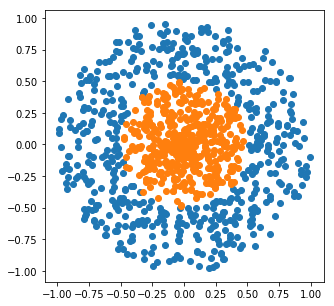

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(data[data[:,2] == 0,0], data[data[:,2] == 0,1])
plt.scatter(data[data[:,2] == 1,0], data[data[:,2] == 1,1], color='C1')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = np.asarray(train_test_split(data[:,0:2], data[:,2], test_size=0.3))

## Linear Regression Model
Try to train data with simple model

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(1, input_shape=(2,), kernel_initializer='uniform', activation='sigmoid'))
optimizer = Adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(x_train, y_train, epochs=10, batch_size=2, verbose=1)

Epoch 1/10
700/700 [==============================] - 1s 1ms/step - loss: 0.7214
Epoch 2/10
700/700 [==============================] - 1s 940us/step - loss: 0.7027
Epoch 3/10
700/700 [==============================] - 1s 773us/step - loss: 0.7030
Epoch 4/10
700/700 [==============================] - 1s 1ms/step - loss: 0.7022
Epoch 5/10
700/700 [==============================] - 1s 849us/step - loss: 0.7036
Epoch 6/10
700/700 [==============================] - 1s 1ms/step - loss: 0.7053
Epoch 7/10
700/700 [==============================] - 1s 1ms/step - loss: 0.7129
Epoch 8/10
700/700 [==============================] - 1s 916us/step - loss: 0.7084
Epoch 9/10
700/700 [==============================] - 1s 752us/step - loss: 0.7142
Epoch 10/10
700/700 [==============================] - 1s 886us/step - loss: 0.7063


In [8]:
print(model.evaluate(x_test, y_test, batch_size=1))

300/300 [==============================] - 0s 1ms/step
0.696581327418


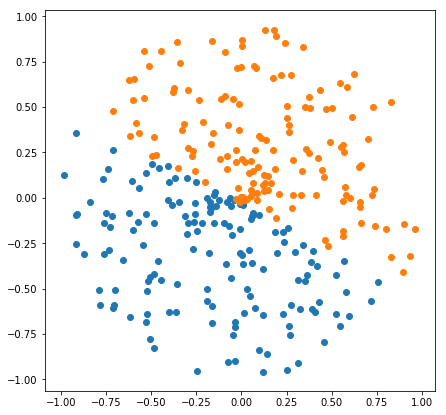

In [9]:
plt.figure(figsize=(7,7))
y_predict = model.predict(x_test).reshape(-1)
y_predict = y_predict < 0.5
plt.scatter(x_test[y_predict, 0], x_test[y_predict, 1])
plt.scatter(x_test[y_predict == False, 0], x_test[y_predict == False, 1], color='C1')
plt.show()

## New Model
Add complexity to model

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

def model_v1():
    model = Sequential()
    model.add(Dense(2, input_shape=(2,)))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(lr=0.05)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model

def model_v2():
    model = Sequential()
    model.add(Dense(128, input_shape=(2,)))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(lr=0.05)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model

def model_v3():
    model = Sequential()
    model.add(Dense(4, input_shape=(2,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(lr=0.05)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model

model = model_v1() # Edit this line
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x_train, y_train, epochs=10, batch_size=2, verbose=1)

Epoch 1/10
700/700 [==============================] - 1s 1ms/step - loss: 0.5164
Epoch 2/10
700/700 [==============================] - 1s 1ms/step - loss: 0.2057
Epoch 3/10
700/700 [==============================] - 1s 1ms/step - loss: 0.1454
Epoch 4/10
700/700 [==============================] - 1s 1ms/step - loss: 0.1879
Epoch 5/10
700/700 [==============================] - 1s 975us/step - loss: 0.1279
Epoch 6/10
700/700 [==============================] - 1s 949us/step - loss: 0.1182
Epoch 7/10
700/700 [==============================] - 1s 938us/step - loss: 0.0962
Epoch 8/10
700/700 [==============================] - 1s 951us/step - loss: 0.0907
Epoch 9/10
700/700 [==============================] - 1s 932us/step - loss: 0.0935
Epoch 10/10
700/700 [==============================] - 1s 940us/step - loss: 0.0980


In [12]:
print(model.evaluate(x_test, y_test, batch_size=1))

300/300 [==============================] - 0s 1ms/step
0.0699906391917


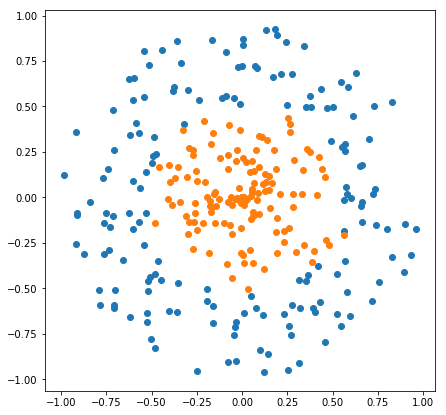

In [13]:
plt.figure(figsize=(7,7))
y_predict = model.predict(x_test).reshape(-1)
y_predict = y_predict < 0.5
plt.scatter(x_test[y_predict, 0], x_test[y_predict, 1])
plt.scatter(x_test[y_predict == False, 0], x_test[y_predict == False, 1], color='C1')
plt.show()